In [1]:
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
# from model import Net 
import albumentations as A
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm 
import torch.backends.cudnn as cudnn 
from torch.utils.data import Dataset,DataLoader



from utils import Draw,loader,class_accuracy
from model import Net
from main import Performance,scores

In [4]:
trainloader,testloader = loader.load_data()

Files already downloaded and verified
Files already downloaded and verified


Plotting Test Images!
  cat  ship  ship plane  frog  frog   car  frog   cat   car plane truck   dog horse truck  ship
3 images are plotted


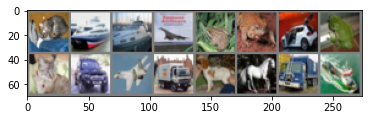

In [6]:
# get some random testing images
from colorama import Fore,Style

print(Style.BRIGHT+Fore.GREEN+'Plotting Test Images!')
dataiter = next(iter(testloader))
classes = ('plane', 'car', 'bird', 'cat',
            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
labels = dataiter[1]
image_set , labels = dataiter
idx = 16
print(' '.join('%5s' % classes[labels[j]] for j in range(idx)))
Draw.plotings(torchvision.utils.make_grid(image_set[:idx]))

Let us show some of the training images, for fun.



Plotting Train Images!
  car   cat truck   car  frog plane  deer horse  deer   cat plane   car   dog plane  ship   car
3 images are plotted


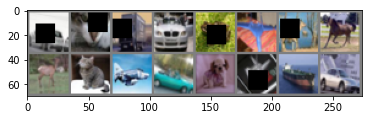

In [7]:

print(Style.BRIGHT+Fore.RED+'Plotting Train Images!')
# get some random training images
dataiter = next(iter(trainloader))
classes = ('plane', 'car', 'bird', 'cat',
            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
labels = dataiter[1]
image_set , labels = dataiter
idx = 16
print(' '.join('%5s' % classes[labels[j]] for j in range(idx)))
# plt.imshow(image_set[4])
Draw.plotings(torchvision.utils.make_grid(image_set[:idx]))

In [8]:
# !pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(3, 32, 32))
print(device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             448
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
            Conv2d-4           [-1, 32, 30, 30]           4,640
       BatchNorm2d-5           [-1, 32, 30, 30]              64
              ReLU-6           [-1, 32, 30, 30]               0
            Conv2d-7           [-1, 32, 28, 28]           9,248
       BatchNorm2d-8           [-1, 32, 28, 28]              64
              ReLU-9           [-1, 32, 28, 28]               0
           Conv2d-10          [-1, 128, 24, 24]          36,992
      BatchNorm2d-11          [-1, 128, 24, 24]             256
             ReLU-12          [-1, 128, 24, 24]               0
           Conv2d-13           [-1, 64, 22, 22]          73,792
      BatchNorm2d-14           [-1, 64,

In [ ]:
# model =  Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 84
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    Performance().train(model, device, trainloader, optimizer, epoch)
    Performance().test(model, device, testloader)

EPOCH: 0


Loss=1.5532113313674927 Batch_id=390 train-Accuracy=34.08: 100%|██████████| 391/391 [00:20<00:00, 19.06it/s]



Test set: Average loss: 0.0122, val-Accuracy: 4357/10000 (43.57%)

EPOCH: 1


Loss=1.4234483242034912 Batch_id=390 train-Accuracy=44.70: 100%|██████████| 391/391 [00:20<00:00, 19.43it/s]



Test set: Average loss: 0.0101, val-Accuracy: 5367/10000 (53.67%)

EPOCH: 2


Loss=1.2633463144302368 Batch_id=390 train-Accuracy=50.01: 100%|██████████| 391/391 [00:19<00:00, 19.89it/s]



Test set: Average loss: 0.0087, val-Accuracy: 6061/10000 (60.61%)

EPOCH: 3


Loss=1.1361433267593384 Batch_id=390 train-Accuracy=53.67: 100%|██████████| 391/391 [00:20<00:00, 18.65it/s]



Test set: Average loss: 0.0083, val-Accuracy: 6320/10000 (63.20%)

EPOCH: 4


Loss=1.1376609802246094 Batch_id=390 train-Accuracy=56.58: 100%|██████████| 391/391 [00:20<00:00, 19.06it/s]



Test set: Average loss: 0.0075, val-Accuracy: 6594/10000 (65.94%)

EPOCH: 5


Loss=1.1900017261505127 Batch_id=390 train-Accuracy=58.49: 100%|██████████| 391/391 [00:19<00:00, 19.82it/s]



Test set: Average loss: 0.0074, val-Accuracy: 6679/10000 (66.79%)

EPOCH: 6


Loss=1.126697301864624 Batch_id=390 train-Accuracy=59.95: 100%|██████████| 391/391 [00:20<00:00, 19.03it/s]



Test set: Average loss: 0.0068, val-Accuracy: 6967/10000 (69.67%)

EPOCH: 7


Loss=1.0429743528366089 Batch_id=390 train-Accuracy=61.42: 100%|██████████| 391/391 [00:20<00:00, 19.15it/s]



Test set: Average loss: 0.0073, val-Accuracy: 6797/10000 (67.97%)

EPOCH: 8


Loss=1.0074306726455688 Batch_id=390 train-Accuracy=62.78: 100%|██████████| 391/391 [00:20<00:00, 19.49it/s]



Test set: Average loss: 0.0063, val-Accuracy: 7212/10000 (72.12%)

EPOCH: 9


Loss=0.8851386904716492 Batch_id=390 train-Accuracy=63.80: 100%|██████████| 391/391 [00:19<00:00, 19.73it/s]



Test set: Average loss: 0.0062, val-Accuracy: 7290/10000 (72.90%)

EPOCH: 10


Loss=1.1610329151153564 Batch_id=390 train-Accuracy=64.74: 100%|██████████| 391/391 [00:20<00:00, 19.22it/s]



Test set: Average loss: 0.0058, val-Accuracy: 7392/10000 (73.92%)

EPOCH: 11


Loss=1.0021559000015259 Batch_id=390 train-Accuracy=65.51: 100%|██████████| 391/391 [00:21<00:00, 18.31it/s]



Test set: Average loss: 0.0061, val-Accuracy: 7265/10000 (72.65%)

EPOCH: 12


Loss=1.179013967514038 Batch_id=390 train-Accuracy=65.79: 100%|██████████| 391/391 [00:19<00:00, 19.59it/s]



Test set: Average loss: 0.0061, val-Accuracy: 7259/10000 (72.59%)

EPOCH: 13


Loss=0.8243702054023743 Batch_id=390 train-Accuracy=66.66: 100%|██████████| 391/391 [00:19<00:00, 19.67it/s]



Test set: Average loss: 0.0056, val-Accuracy: 7562/10000 (75.62%)

EPOCH: 14


Loss=1.0930062532424927 Batch_id=390 train-Accuracy=67.72: 100%|██████████| 391/391 [00:20<00:00, 19.18it/s]



Test set: Average loss: 0.0055, val-Accuracy: 7569/10000 (75.69%)

EPOCH: 15


Loss=0.9444414377212524 Batch_id=390 train-Accuracy=68.06: 100%|██████████| 391/391 [00:21<00:00, 18.04it/s]



Test set: Average loss: 0.0051, val-Accuracy: 7755/10000 (77.55%)

EPOCH: 16


Loss=0.8857048153877258 Batch_id=390 train-Accuracy=68.84: 100%|██████████| 391/391 [00:19<00:00, 19.74it/s]



Test set: Average loss: 0.0052, val-Accuracy: 7714/10000 (77.14%)

EPOCH: 17


Loss=0.6627038717269897 Batch_id=390 train-Accuracy=69.22: 100%|██████████| 391/391 [00:20<00:00, 19.38it/s]



Test set: Average loss: 0.0050, val-Accuracy: 7843/10000 (78.43%)

EPOCH: 18


Loss=0.8622552752494812 Batch_id=390 train-Accuracy=69.28: 100%|██████████| 391/391 [00:21<00:00, 18.59it/s]



Test set: Average loss: 0.0052, val-Accuracy: 7766/10000 (77.66%)

EPOCH: 19


Loss=0.8012579083442688 Batch_id=390 train-Accuracy=70.07: 100%|██████████| 391/391 [00:20<00:00, 19.41it/s]



Test set: Average loss: 0.0049, val-Accuracy: 7860/10000 (78.60%)

EPOCH: 20


Loss=0.9610188603401184 Batch_id=390 train-Accuracy=70.49: 100%|██████████| 391/391 [00:20<00:00, 19.52it/s]



Test set: Average loss: 0.0049, val-Accuracy: 7865/10000 (78.65%)

EPOCH: 21


Loss=0.8292733430862427 Batch_id=390 train-Accuracy=70.70: 100%|██████████| 391/391 [00:20<00:00, 18.81it/s]



Test set: Average loss: 0.0053, val-Accuracy: 7707/10000 (77.07%)

EPOCH: 22


Loss=0.8635832667350769 Batch_id=390 train-Accuracy=70.76: 100%|██████████| 391/391 [00:20<00:00, 19.17it/s]



Test set: Average loss: 0.0050, val-Accuracy: 7861/10000 (78.61%)

EPOCH: 23


Loss=0.8427149653434753 Batch_id=390 train-Accuracy=71.27: 100%|██████████| 391/391 [00:19<00:00, 19.61it/s]



Test set: Average loss: 0.0050, val-Accuracy: 7787/10000 (77.87%)

EPOCH: 24


Loss=0.8567527532577515 Batch_id=390 train-Accuracy=71.52: 100%|██████████| 391/391 [00:19<00:00, 19.68it/s]



Test set: Average loss: 0.0046, val-Accuracy: 7999/10000 (79.99%)

EPOCH: 25


Loss=0.7726011276245117 Batch_id=390 train-Accuracy=71.67: 100%|██████████| 391/391 [00:21<00:00, 18.50it/s]



Test set: Average loss: 0.0047, val-Accuracy: 7938/10000 (79.38%)

EPOCH: 26


Loss=0.6759370565414429 Batch_id=390 train-Accuracy=72.08: 100%|██████████| 391/391 [00:20<00:00, 19.34it/s]



Test set: Average loss: 0.0044, val-Accuracy: 8052/10000 (80.52%)

EPOCH: 27


Loss=1.0231658220291138 Batch_id=390 train-Accuracy=72.46: 100%|██████████| 391/391 [00:19<00:00, 19.66it/s]



Test set: Average loss: 0.0044, val-Accuracy: 8109/10000 (81.09%)

EPOCH: 28


Loss=0.7903432846069336 Batch_id=390 train-Accuracy=72.62: 100%|██████████| 391/391 [00:20<00:00, 19.15it/s]



Test set: Average loss: 0.0047, val-Accuracy: 7946/10000 (79.46%)

EPOCH: 29


Loss=0.6138726472854614 Batch_id=390 train-Accuracy=72.81: 100%|██████████| 391/391 [00:20<00:00, 19.13it/s]



Test set: Average loss: 0.0044, val-Accuracy: 8073/10000 (80.73%)

EPOCH: 30


Loss=0.8683226704597473 Batch_id=390 train-Accuracy=73.34: 100%|██████████| 391/391 [00:19<00:00, 19.64it/s]



Test set: Average loss: 0.0044, val-Accuracy: 8085/10000 (80.85%)

EPOCH: 31


Loss=0.8011491894721985 Batch_id=390 train-Accuracy=73.37: 100%|██████████| 391/391 [00:20<00:00, 19.49it/s]



Test set: Average loss: 0.0043, val-Accuracy: 8133/10000 (81.33%)

EPOCH: 32


Loss=0.8283963203430176 Batch_id=390 train-Accuracy=73.73: 100%|██████████| 391/391 [00:20<00:00, 19.02it/s]



Test set: Average loss: 0.0043, val-Accuracy: 8130/10000 (81.30%)

EPOCH: 33


Loss=0.8261019587516785 Batch_id=390 train-Accuracy=74.01: 100%|██████████| 391/391 [00:20<00:00, 19.43it/s]



Test set: Average loss: 0.0044, val-Accuracy: 8089/10000 (80.89%)

EPOCH: 34


Loss=0.7390472292900085 Batch_id=390 train-Accuracy=74.10: 100%|██████████| 391/391 [00:19<00:00, 19.60it/s]



Test set: Average loss: 0.0044, val-Accuracy: 8089/10000 (80.89%)

EPOCH: 35


Loss=0.8403115272521973 Batch_id=390 train-Accuracy=74.08: 100%|██████████| 391/391 [00:20<00:00, 18.65it/s]



Test set: Average loss: 0.0042, val-Accuracy: 8168/10000 (81.68%)

EPOCH: 36


Loss=0.8347339630126953 Batch_id=390 train-Accuracy=74.49: 100%|██████████| 391/391 [00:20<00:00, 19.04it/s]



Test set: Average loss: 0.0042, val-Accuracy: 8174/10000 (81.74%)

EPOCH: 37


Loss=0.7283098697662354 Batch_id=390 train-Accuracy=74.70: 100%|██████████| 391/391 [00:20<00:00, 19.48it/s]



Test set: Average loss: 0.0043, val-Accuracy: 8151/10000 (81.51%)

EPOCH: 38


Loss=0.6445275545120239 Batch_id=390 train-Accuracy=74.94: 100%|██████████| 391/391 [00:20<00:00, 19.36it/s]



Test set: Average loss: 0.0041, val-Accuracy: 8223/10000 (82.23%)

EPOCH: 39


Loss=0.5721868872642517 Batch_id=390 train-Accuracy=75.06: 100%|██████████| 391/391 [00:20<00:00, 18.83it/s]



Test set: Average loss: 0.0042, val-Accuracy: 8188/10000 (81.88%)

EPOCH: 40


Loss=0.7728317975997925 Batch_id=390 train-Accuracy=75.17: 100%|██████████| 391/391 [00:20<00:00, 19.22it/s]



Test set: Average loss: 0.0044, val-Accuracy: 8162/10000 (81.62%)

EPOCH: 41


Loss=0.7087947726249695 Batch_id=390 train-Accuracy=75.26: 100%|██████████| 391/391 [00:19<00:00, 19.58it/s]



Test set: Average loss: 0.0040, val-Accuracy: 8290/10000 (82.90%)

EPOCH: 42


Loss=0.6234145164489746 Batch_id=390 train-Accuracy=75.46: 100%|██████████| 391/391 [00:20<00:00, 19.10it/s]



Test set: Average loss: 0.0041, val-Accuracy: 8240/10000 (82.40%)

EPOCH: 43


Loss=0.5962425470352173 Batch_id=390 train-Accuracy=75.38: 100%|██████████| 391/391 [00:20<00:00, 18.76it/s]



Test set: Average loss: 0.0039, val-Accuracy: 8323/10000 (83.23%)

EPOCH: 44


Loss=0.48585423827171326 Batch_id=390 train-Accuracy=75.69: 100%|██████████| 391/391 [00:20<00:00, 18.89it/s]



Test set: Average loss: 0.0041, val-Accuracy: 8254/10000 (82.54%)

EPOCH: 45


Loss=0.7905847430229187 Batch_id=390 train-Accuracy=76.01: 100%|██████████| 391/391 [00:21<00:00, 18.23it/s]



Test set: Average loss: 0.0038, val-Accuracy: 8328/10000 (83.28%)

EPOCH: 46


Loss=0.6330890655517578 Batch_id=132 train-Accuracy=76.17:  34%|███▍      | 133/391 [03:52<1:53:54, 26.49s/it]

In [12]:
train_acc,train_losses = Performance().scores()[:2]
test_acc,test_losses = Performance().scores()[2:]
print(test_acc)

[]


Text(0.5, 1.0, 'Test Accuracy')

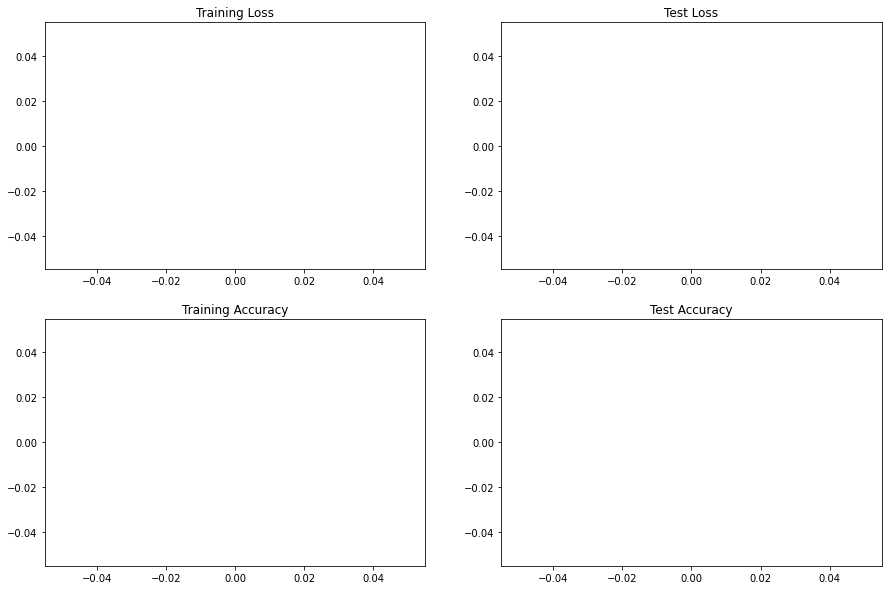

In [11]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot([t.cpu().item() for t in train_losses])
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

In [14]:
mis_prediction_scores = Mis_predict.rate(testloader,model,classes)

In [16]:
for label,acc in mis_prediction_scores.items():
  print(label,":",round(acc,2))

plane : 93.1
car : 96.43
bird : 63.64
cat : 79.41
deer : 70.37
dog : 66.67
frog : 91.67
horse : 88.0
ship : 93.75
truck : 87.18
